In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 20000)
# Base folder for the Instacart dataset
BASE_PATH = "C:\\Users\\Porfirio\\Desktop\\proj3\\comp541Proj\\"
#BASE_PATH = "drive/MyDrive/COMP 541/instacart-market-basket-analysis/"

# 1. Orders data
df_orders = pd.read_csv(f"{BASE_PATH}orders.csv")

# 2. Products data
df_products = pd.read_csv(f"{BASE_PATH}products.csv")

# 3. Departments data
df_departments = pd.read_csv(f"{BASE_PATH}departments.csv")

#4. Aisles
df_aisles = pd.read_csv(f"{BASE_PATH}aisles.csv")

#5. Order Products Train
df_order_products_train = pd.read_csv(f"{BASE_PATH}order_products__train.csv")

In [12]:
display(df_orders)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [13]:
display(df_products)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [14]:
display(df_departments)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Ideas/Questions to ask:

What day of the week do people buy alcohol the most????

Do items purchased influence a person's chance of ordering on instacart again?
-NOT FEASIBLE BECASUE NOT ALL ORDERS ARE IN DATASET


What else do you buy if you’re sick?




In [17]:
# Getting all orders where there is no prior order
df_no_prior = df_orders[df_orders['days_since_prior_order'].isna()]
display(df_no_prior)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


In [18]:
# Getting all the products from the orders in df_no_prior
df_no_prior_products = df_order_products_train[
    df_order_products_train['order_id'].isin(df_no_prior['order_id'])
]

# Merge with df_products to get product details
df_no_prior_products = df_no_prior_products.merge(
    df_products[['product_id', 'product_name']], on='product_id', how='left'
)

# Display the resulting DataFrame
display(df_no_prior_products)

,order_id,product_id,add_to_cart_order,reordered,product_name


In [19]:
#Sorting order by prior order days in descending order
df_orders = df_orders.sort_values(by='days_since_prior_order', ascending=False)
#Getting the top 100 orders with the most days since prior order
df_top_100_orders = df_orders.head(100)
#Getting all orders that have days since prior order 2 weeks or more
df_old_orders = df_orders[df_orders['days_since_prior_order'] >= 14]
display(df_old_orders)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421079,1854736,206209,prior,11,4,10,30.0
9,2550362,1,prior,10,4,8,30.0
55,2402008,7,prior,2,1,19,30.0
56,121053,7,prior,3,0,18,30.0
44,329954,4,test,6,3,12,30.0
...,...,...,...,...,...,...,...
793308,3006236,47685,prior,27,5,8,14.0
1769955,2766715,106268,prior,3,6,14,14.0
1769943,2716798,106267,prior,12,6,21,14.0
1769940,3173697,106267,prior,9,6,15,14.0


In [20]:
# Get customer ids that have a prior order that is 2 weeks or more
df_old_orders_customers = df_old_orders['user_id'].unique()

# Get the orders_number from customers that is 2 weeks or more
df_old_orders_number = df_orders[df_orders['user_id'].isin(df_old_orders_customers)]

# Get the previous order for each order in df_old_orders_number that is 2 weeks or more



# Ensure chronological order inside each user
df_orders = df_orders.sort_values(['user_id', 'order_number'])

# Shift to get the previous order_id per user
df_orders['prev_order_id'] = (
    df_orders.groupby('user_id')['order_id'].shift(1)
             .astype('Int64')          # <- key line: convert float → nullable integer
)

# Optional: convert other helper columns as well
df_orders['prev_order_num']  = (df_orders['order_number'] - 1).astype('Int64')
df_orders['prev_days_since'] = (
    df_orders.groupby('user_id')['days_since_prior_order'].shift(1)
             .astype('Int64')
)

# Filter for ≥ 14‑day gaps
df_long_gaps = df_orders.loc[df_orders['days_since_prior_order'] >= 14, [
    'user_id',
    'order_id', 'order_number', 'days_since_prior_order',
    'prev_order_id', 'prev_order_num', 'prev_days_since'
]]

display(df_long_gaps)

,user_id,order_id,order_number,days_since_prior_order,prev_order_id,prev_order_num,prev_days_since
1,1,2398795,2,15.0,2539329,1,<NA>
2,1,473747,3,21.0,2398795,2,15
3,1,2254736,4,29.0,473747,3,21
4,1,431534,5,28.0,2254736,4,29
5,1,3367565,6,19.0,431534,5,28
...,...,...,...,...,...,...,...
3421077,206209,2558525,9,22.0,2129269,8,22
3421078,206209,2266710,10,29.0,2558525,9,22
3421079,206209,1854736,11,30.0,2266710,10,29
3421080,206209,626363,12,18.0,1854736,11,30


In [21]:
#Getting the products from the orders in df_long_gaps
df_long_gaps_products = df_order_products_train[
    df_order_products_train['order_id'].isin(df_long_gaps['prev_order_id'])
]
# Merge with df_products to get product details
df_long_gaps_products = df_long_gaps_products.merge(
    df_products[['product_id', 'product_name']], on='product_id', how='left'
)
# Display the resulting DataFrame
display(df_long_gaps_products)

,order_id,product_id,add_to_cart_order,reordered,product_name


In [22]:
#Getting all products for the orders in df_old_orders
df_old_orders_products = df_order_products_train[df_order_products_train['order_id'].isin(df_old_orders['order_id'])]
#Display the resulting DataFrame
df_old_orders_products = df_old_orders_products.merge(
    df_products[['product_id', 'product_name']], on='product_id', how='left'
)
# Display the resulting DataFrame
#display(df_old_orders_products)

#Get top 100 products ordered in the old orders
df_top_100_old_orders = df_old_orders_products.groupby('product_name').agg({'order_id': 'count'}).reset_index()
#Creating new DF to store the top 10 products
df_top_100_old_orders = df_top_100_old_orders.sort_values(by='order_id', ascending=False).head(100)
#Renaming the columns
df_top_100_old_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)
#Sorting the dataframe by total orders in descending order
df_top_10_old_orders = df_top_100_old_orders.sort_values(by='total_orders', ascending=False)
#Display the resulting DataFrame
display(df_top_100_old_orders)

,product_name,total_orders
2416,Banana,9978
2270,Bag of Organic Bananas,7595
19458,Organic Baby Spinach,5404
21863,Organic Strawberries,5185
15129,Large Lemon,4641
19429,Organic Avocado,3923
29479,Strawberries,3563
20596,Organic Hass Avocado,3562
15833,Limes,3343
19585,Organic Blueberries,2611


***PEOPLE USE INSTACART TO BUY PRODUCE AFTER ABOUT A MONTH OF NOT USING IT***

In [ ]:
#Show all products that have aisle_id 11
df_aisles[df_aisles['aisle_id'] == 11]
#expand the products column to show full product names when display is called
pd.set_option('display.max_colwidth', None)
display(df_products[df_products['aisle_id'] == 11])

,product_id,product_name,aisle_id,department_id
5,6,Dry Nose Oil,11,11
12,13,Saline Nasal Mist,11,11
202,203,"Rescue Remedy, Spray",11,11
254,255,"Cold Remedy, Quick Dissolve Tablets, Cherry Flavor",11,11
360,361,Day and Night Multi-Symptom and Severe Cold & Cough Pain Reliever/Fever Reducer,11,11
412,413,Dual Action Beta Immune and Anti-Oxidant Effervescent Citrus,11,11
460,461,Sore Throat Wild Cherry Lozenges,11,11
576,577,Liqui-Gels Softgels Dye-Free Allergy,11,11
602,603,NasaFlo Neti Pot Sinus Relief with Premixed,11,11
758,759,Pain Reliever and Fever Reducer Cherry Infant Drops,11,11


In [ ]:
#Get top 100 products ordered from aisle_id 11
df_top_100_aisle_11 = df_products[df_products['aisle_id'] == 11].merge(
    df_order_products_train[['order_id', 'product_id']], on='product_id', how='left'
)
#Grouping by product name and counting the number of orders
df_top_100_aisle_11 = df_top_100_aisle_11.groupby('product_name').agg({'order_id': 'count'}).reset_index()
#Creating new DF to store the top 10 products
df_top_100_aisle_11 = df_top_100_aisle_11.sort_values(by='order_id', ascending=False).head(100)
#Renaming the columns
df_top_100_aisle_11.rename(columns={'order_id': 'total_orders'}, inplace=True)
#Sorting the dataframe by total orders in descending order
df_top_100_aisle_11 = df_top_100_aisle_11.sort_values(by='total_orders', ascending=False)
#Display the resulting DataFrame
display(df_top_100_aisle_11)
# 


,product_name,total_orders
326,Oscillo Oscillococcinum Quick-Dissolving Pellets,55
395,The Original Natural Herb Drops Cough Suppressant,34
141,Coldcalm Homeopathic Tablets,32
212,Honey Lemon Menthol Drops Cough Suppressant/Oral Anesthetic,31
77,Cherry Honey Soothing Relief Drops,31
51,Allergy Relief Spray,29
15,24 Hour Non-Drowsy Allergy Relief,27
215,Honey-Herb Drops Cough Suppressant,23
101,Children's Pain and Fever Grape Splash Liquid,21
238,LemonMint Herb Throat Drops,16


In [ ]:
#Get orders that have aisle_id 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]
#Remove product_id column from the dataframe
df_aisle_11_orders = df_aisle_11_orders.drop(columns=['product_id'])
display(df_aisle_11_orders)

,order_id,product_id,add_to_cart_order,reordered,product_name
0,112,4549,9,0,Umcka Elderberry Intensive Cold + Flu Berry Flavor
1,2415,28188,6,0,Luden's Throat Drops Wild Cherry
2,2820,35274,3,0,Nasal Relief Spray
3,4250,34204,1,0,"Children's Night Time Multi-Symptom Cold Liquid, Mixed Berry"
4,6880,33494,2,1,Original Nasal Spray
5,9322,41614,22,1,Nasal Relief Simply Saline Nasal Mist
6,15430,46122,1,0,DayQuil/NyQuil Severe Cold & Flu Twin
7,19204,37285,14,0,Extra Nasal Strips
8,19739,31921,1,1,Severe Daytime Non-Drowsy Caplets Sinus Congestion & Pain
9,25501,28188,5,1,Luden's Throat Drops Wild Cherry


In [39]:
# Filter orders that have products from aisle 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]

# Get all products from the orders that contain products from aisle 11
df_all_products_in_aisle_11_orders = df_order_products_train[df_order_products_train['order_id'].isin(df_aisle_11_orders['order_id'])]

# Merge with df_products to get product details
df_all_products_in_aisle_11_orders = df_all_products_in_aisle_11_orders.merge(
    df_products[['product_id', 'product_name', 'aisle_id']], on='product_id', how='left'
)

# Exclude products from aisle 11
df_non_aisle_11_products = df_all_products_in_aisle_11_orders[df_all_products_in_aisle_11_orders['aisle_id'] != 11]

# Get the top products that are not from aisle 11
df_top_non_aisle_11_products = df_non_aisle_11_products.groupby('product_name').agg({'order_id': 'count'}).reset_index()
df_top_non_aisle_11_products = df_top_non_aisle_11_products.sort_values(by='order_id', ascending=False).head(100)
df_top_non_aisle_11_products.rename(columns={'order_id': 'total_orders'}, inplace=True)

# Display the resulting DataFrame
display(df_top_non_aisle_11_products)

,product_name,total_orders
449,Banana,117
405,Bag of Organic Bananas,74
4069,Organic Strawberries,48
2716,Large Lemon,48
3792,Organic Hass Avocado,41
5468,Strawberries,41
3535,Organic Avocado,41
3963,Organic Raspberries,36
599,Blueberries,32
3545,Organic Baby Spinach,30


In [41]:
#Show the percentage of orders that have aisle_id 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['product_id'].isin(df_products[df_products['aisle_id'] == 11]['product_id'])]
#Get the total number of orders
df_total_orders = df_order_products_train['order_id'].nunique()
#Get the total number of orders that have aisle_id 11
display(df_aisle_11_orders['order_id'].nunique())

1090

In [43]:
# Total number of products ordered with a product from aisle 11
total_products_in_aisle_11_orders = df_all_products_in_aisle_11_orders.shape[0]

# Total number of non-aisle 11 products ordered with a product from aisle 11
total_non_aisle_11_products = df_non_aisle_11_products.shape[0]

# Calculate the percentage
percentage_non_aisle_11 = (total_non_aisle_11_products / total_products_in_aisle_11_orders) * 100
# Calculate the percentage for each product
df_top_non_aisle_11_products['percentage'] = (df_top_non_aisle_11_products['total_orders'] / total_products_in_aisle_11_orders) * 100

# Sort by percentage in descending order
df_top_non_aisle_11_products = df_top_non_aisle_11_products.sort_values(by='percentage', ascending=False)

# Display the resulting DataFrame
display(df_top_non_aisle_11_products)
# Display the result
print(f"Percentage of products not from aisle 11 but ordered with a product from aisle 11: {percentage_non_aisle_11:.2f}%")

,product_name,total_orders,percentage
449,Banana,117,0.873265
405,Bag of Organic Bananas,74,0.552321
4069,Organic Strawberries,48,0.358262
2716,Large Lemon,48,0.358262
3792,Organic Hass Avocado,41,0.306016
5468,Strawberries,41,0.306016
3535,Organic Avocado,41,0.306016
3963,Organic Raspberries,36,0.268697
599,Blueberries,32,0.238842
3545,Organic Baby Spinach,30,0.223914


Percentage of products not from aisle 11 but ordered with a product from aisle 11: 89.95%


,aisle_id,total_products,percentage,aisle
0,100,1258,12.349072,missing
1,45,1246,12.231275,candy chocolate
2,37,1091,10.709728,ice cream ice
3,47,1038,10.189457,vitamins supplements
4,120,1026,10.071660,yogurt
5,107,989,9.708452,chips pretzels
6,94,894,8.775891,tea
7,21,891,8.746442,packaged cheese
8,38,880,8.638461,frozen meals
9,61,874,8.579562,cookies cakes


<Axes: >

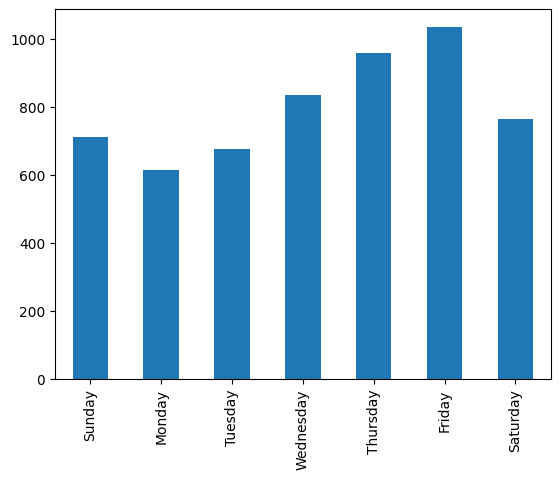

In [29]:
df_order_products_depatments = df_order_products_train.merge(df_products[['product_id', 'department_id']], on='product_id', how='left')
df_order_products_depatments_dow = df_order_products_depatments.merge(df_orders[['order_id', 'order_dow']], on='order_id', how='left')
df_alcohol_orders = df_order_products_depatments_dow[df_order_products_depatments_dow['department_id'] == 5]

dow_al_count = df_alcohol_orders['order_dow'].value_counts()

dow_al_count = dow_al_count.sort_index()
dow_al_count

dow_al_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_al_count

dow_total_count = df_order_products_depatments_dow['order_dow'].value_counts()
dow_total_count = dow_total_count.sort_index()
dow_total_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_total_count

dow_combined = dow_al_count / dow_total_count
dow_combined.plot(kind='bar')

dow_al_count.plot(kind='bar')